# Clustering - Validação - Economiza+ MVP

**Objetivo:** Validar o modelo de clustering com métricas de qualidade

**CHECKPOINT:** Silhouette Score > 0.5

---

## Checklist:
- [ ] Calcular Silhouette Score
- [ ] Calcular Davies-Bouldin Index
- [ ] Validar: Silhouette > 0.5
- [ ] Visualização PCA 2D

**Entregável:** Métricas + H2 VALIDADA

## 1. Importar Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score, davies_bouldin_score, silhouette_samples
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import joblib
import warnings
warnings.filterwarnings('ignore')

# Configurações de visualização
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

## 2. Carregar Dados e Modelo

In [2]:
# Carregar dados processados
df = pd.read_csv('../data/processed/features_clustering.csv')

print(f"Dataset carregado: {df.shape}")
print(f"\nPrimeiras linhas:")
df.head()

Dataset carregado: (500, 6)

Primeiras linhas:


,user_id,media_renda,media_gasto,taxa_poupanca,pct_gastos_essenciais,std_gasto
0,user_0001,11614.322645,3834.969272,0.669807,0.797839,1769.457000
1,user_0002,3615.436000,7084.610157,-0.959545,0.800746,3574.838308
2,user_0003,6055.769376,3473.659979,0.426388,0.843664,1557.497464
3,user_0004,2765.230000,3815.743179,-0.379901,0.798641,1623.244634
4,user_0005,6475.678303,6118.832497,0.055106,0.857996,2422.959028


In [3]:
# Separar features para clustering
# Ajustar conforme as features utilizadas no notebook anterior
feature_cols = [col for col in df.columns if col not in ['user_id', 'cluster', 'data']]

X = df[feature_cols]

print(f"Features selecionadas: {X.shape[1]}")
print(f"Features: {feature_cols}")

Features selecionadas: 5
Features: ['media_renda', 'media_gasto', 'taxa_poupanca', 'pct_gastos_essenciais', 'std_gasto']


In [4]:
# Normalizar dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"Dados normalizados: {X_scaled.shape}")

Dados normalizados: (500, 5)


In [5]:
# Carregar modelo de clustering (se disponível)
try:
    kmeans = joblib.load('../models/kmeans_best.pkl')
    labels = kmeans.predict(X_scaled)
    k_optimal = kmeans.n_clusters
    print(f"Modelo carregado com K = {k_optimal}")
except:
    # Se não houver modelo salvo, usar as labels do dataframe
    if 'cluster' in df.columns:
        labels = df['cluster'].values
        k_optimal = len(np.unique(labels))
        print(f"Labels carregadas do dataset com K = {k_optimal}")
    else:
        print("ERRO: Modelo ou labels de cluster não encontrados!")
        print("Execute o notebook 03_Clustering.ipynb primeiro.")

Modelo carregado com K = 4


## 3. Calcular Métricas de Validação

### 3.1. Silhouette Score

**Interpretação:**
- Varia de -1 a 1
- Valores próximos de 1: clusters bem separados
- Valores próximos de 0: clusters sobrepostos
- Valores negativos: pontos podem estar no cluster errado

**CHECKPOINT: Silhouette > 0.5**

In [6]:
# Calcular Silhouette Score
silhouette_avg = silhouette_score(X_scaled, labels)

print("="*60)
print("MÉTRICA 1: SILHOUETTE SCORE")
print("="*60)
print(f"\nSilhouette Score: {silhouette_avg:.4f}")
print(f"\nInterpretação:")
if silhouette_avg > 0.7:
    print("   EXCELENTE - Clusters muito bem definidos")
elif silhouette_avg > 0.5:
    print("   BOM - Clusters bem separados (CHECKPOINT ATINGIDO!)")
elif silhouette_avg > 0.3:
    print("   RAZOÁVEL - Estrutura de clusters aceitável")
else:
    print("   RUIM - Clusters mal definidos")

print(f"\n{'='*60}")
if silhouette_avg > 0.5:
    print("CHECKPOINT VALIDADO: Silhouette > 0.5")
else:
    print("CHECKPOINT NÃO ATINGIDO: Silhouette ≤ 0.5")
print("="*60)

MÉTRICA 1: SILHOUETTE SCORE

Silhouette Score: 0.2672

Interpretação:
   RUIM - Clusters mal definidos

CHECKPOINT NÃO ATINGIDO: Silhouette ≤ 0.5


### 3.2. Davies-Bouldin Index

**Interpretação:**
- Valores menores são melhores
- Mede a razão entre dispersão intra-cluster e separação inter-cluster
- Ideal: próximo de 0

In [7]:
# Calcular Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(X_scaled, labels)

print("="*60)
print("MÉTRICA 2: DAVIES-BOULDIN INDEX")
print("="*60)
print(f"\nDavies-Bouldin Index: {davies_bouldin:.4f}")
print(f"\nInterpretação:")
if davies_bouldin < 0.5:
    print("   EXCELENTE - Clusters muito coesos e bem separados")
elif davies_bouldin < 1.0:
    print("   BOM - Boa separação entre clusters")
elif davies_bouldin < 1.5:
    print("   RAZOÁVEL - Separação aceitável")
else:
    print("   RUIM - Clusters pouco distintos")
print("="*60)

MÉTRICA 2: DAVIES-BOULDIN INDEX

Davies-Bouldin Index: 1.1839

Interpretação:
   RAZOÁVEL - Separação aceitável


### 3.3. Resumo das Métricas

In [8]:
# Criar DataFrame com resumo das métricas
metricas_validacao = pd.DataFrame({
    'Métrica': ['Silhouette Score', 'Davies-Bouldin Index', 'Número de Clusters'],
    'Valor': [f"{silhouette_avg:.4f}", f"{davies_bouldin:.4f}", k_optimal],
    'Status': [
        'VALIDADO' if silhouette_avg > 0.5 else 'NÃO VALIDADO',
        'BOM' if davies_bouldin < 1.0 else 'REVISAR',
        '-'
    ]
})

print("\n" + "="*60)
print("RESUMO DAS MÉTRICAS DE VALIDAÇÃO")
print("="*60)
print(metricas_validacao.to_string(index=False))
print("="*60)


RESUMO DAS MÉTRICAS DE VALIDAÇÃO
             Métrica  Valor       Status
    Silhouette Score 0.2672 NÃO VALIDADO
Davies-Bouldin Index 1.1839      REVISAR
  Número de Clusters      4            -


## 4. Análise de Silhouette por Cluster

In [9]:
# Calcular silhouette score para cada amostra
silhouette_vals = silhouette_samples(X_scaled, labels)

# Análise por cluster
print("\nSilhouette Score por Cluster:")
print("="*60)
for i in range(k_optimal):
    cluster_silhouette = silhouette_vals[labels == i]
    print(f"Cluster {i}:")
    print(f"  Média: {cluster_silhouette.mean():.4f}")
    print(f"  Tamanho: {len(cluster_silhouette)} amostras")
    print(f"  Min: {cluster_silhouette.min():.4f} | Max: {cluster_silhouette.max():.4f}")
    print()


Silhouette Score por Cluster:
Cluster 0:
  Média: 0.2024
  Tamanho: 86 amostras
  Min: -0.0549 | Max: 0.4281

Cluster 1:
  Média: 0.3150
  Tamanho: 228 amostras
  Min: 0.0603 | Max: 0.5237

Cluster 2:
  Média: 0.2549
  Tamanho: 112 amostras
  Min: -0.0867 | Max: 0.5068

Cluster 3:
  Média: 0.2135
  Tamanho: 74 amostras
  Min: -0.1390 | Max: 0.4593



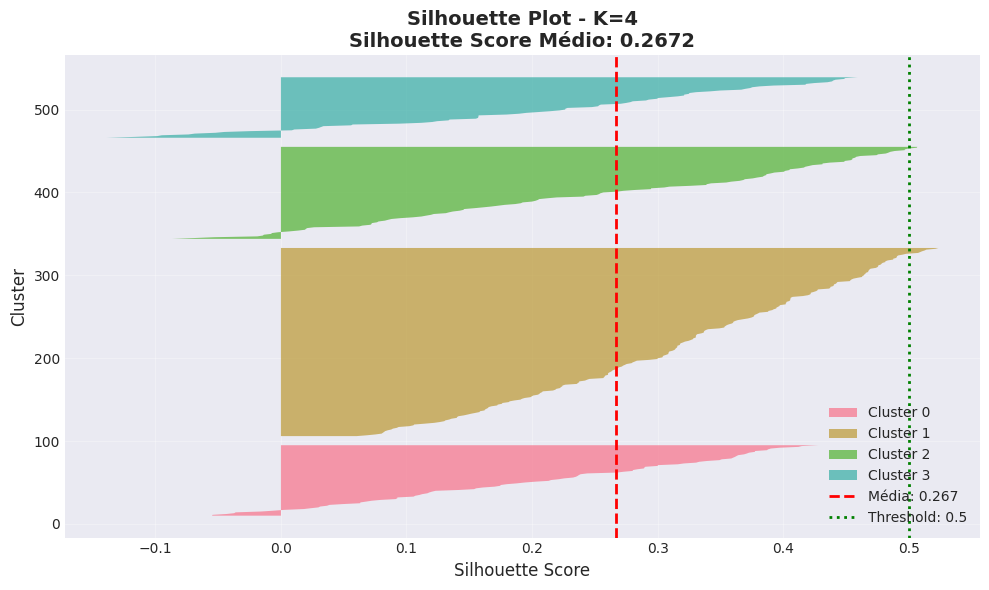

Gráfico salvo em: ../outputs/silhouette_plot.png


In [10]:
# Visualizar Silhouette Score por cluster
fig, ax = plt.subplots(figsize=(10, 6))

y_lower = 10
for i in range(k_optimal):
    cluster_silhouette = silhouette_vals[labels == i]
    cluster_silhouette = np.sort(cluster_silhouette)
    
    size_cluster_i = cluster_silhouette.shape[0]
    y_upper = y_lower + size_cluster_i
    
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                      0, cluster_silhouette,
                      alpha=0.7, label=f'Cluster {i}')
    
    y_lower = y_upper + 10

ax.axvline(x=silhouette_avg, color='red', linestyle='--', 
           linewidth=2, label=f'Média: {silhouette_avg:.3f}')
ax.axvline(x=0.5, color='green', linestyle=':', 
           linewidth=2, label='Threshold: 0.5')

ax.set_xlabel('Silhouette Score', fontsize=12)
ax.set_ylabel('Cluster', fontsize=12)
ax.set_title(f'Silhouette Plot - K={k_optimal}\nSilhouette Score Médio: {silhouette_avg:.4f}', 
             fontsize=14, fontweight='bold')
ax.legend(loc='best')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../outputs/silhouette_plot.png', dpi=300, bbox_inches='tight')
plt.show()

print("Gráfico salvo em: ../outputs/silhouette_plot.png")

## 5. Visualização PCA 2D

Redução de dimensionalidade para visualizar os clusters em 2D

In [11]:
# Aplicar PCA para reduzir para 2 dimensões
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Criar DataFrame para facilitar visualização
df_pca = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'Cluster': labels
})

print(f"Variância explicada:")
print(f"  PC1: {pca.explained_variance_ratio_[0]:.2%}")
print(f"  PC2: {pca.explained_variance_ratio_[1]:.2%}")
print(f"  Total: {pca.explained_variance_ratio_.sum():.2%}")

Variância explicada:
  PC1: 41.76%
  PC2: 31.58%
  Total: 73.34%


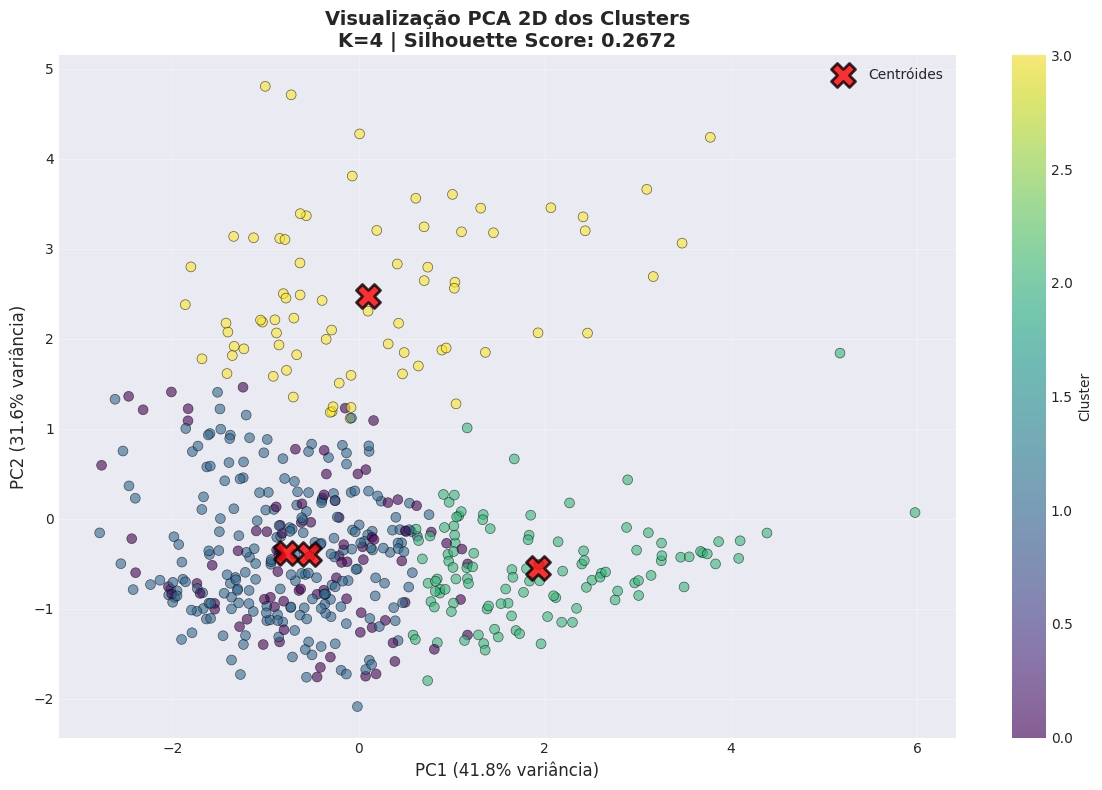

Gráfico salvo em: ../outputs/pca_2d_clusters.png


In [12]:
# Visualização dos clusters em 2D
fig, ax = plt.subplots(figsize=(12, 8))

scatter = ax.scatter(df_pca['PC1'], df_pca['PC2'], 
                     c=df_pca['Cluster'], 
                     cmap='viridis', 
                     s=50, 
                     alpha=0.6,
                     edgecolors='black',
                     linewidth=0.5)

# Adicionar centroides se o modelo estiver disponível
try:
    centroids_pca = pca.transform(kmeans.cluster_centers_)
    ax.scatter(centroids_pca[:, 0], centroids_pca[:, 1],
               c='red', s=300, alpha=0.8,
               edgecolors='black', linewidth=2,
               marker='X', label='Centróides')
except:
    pass

plt.colorbar(scatter, label='Cluster', ax=ax)
ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variância)', fontsize=12)
ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variância)', fontsize=12)
ax.set_title(f'Visualização PCA 2D dos Clusters\nK={k_optimal} | Silhouette Score: {silhouette_avg:.4f}',
             fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../outputs/pca_2d_clusters.png', dpi=300, bbox_inches='tight')
plt.show()

print("Gráfico salvo em: ../outputs/pca_2d_clusters.png")

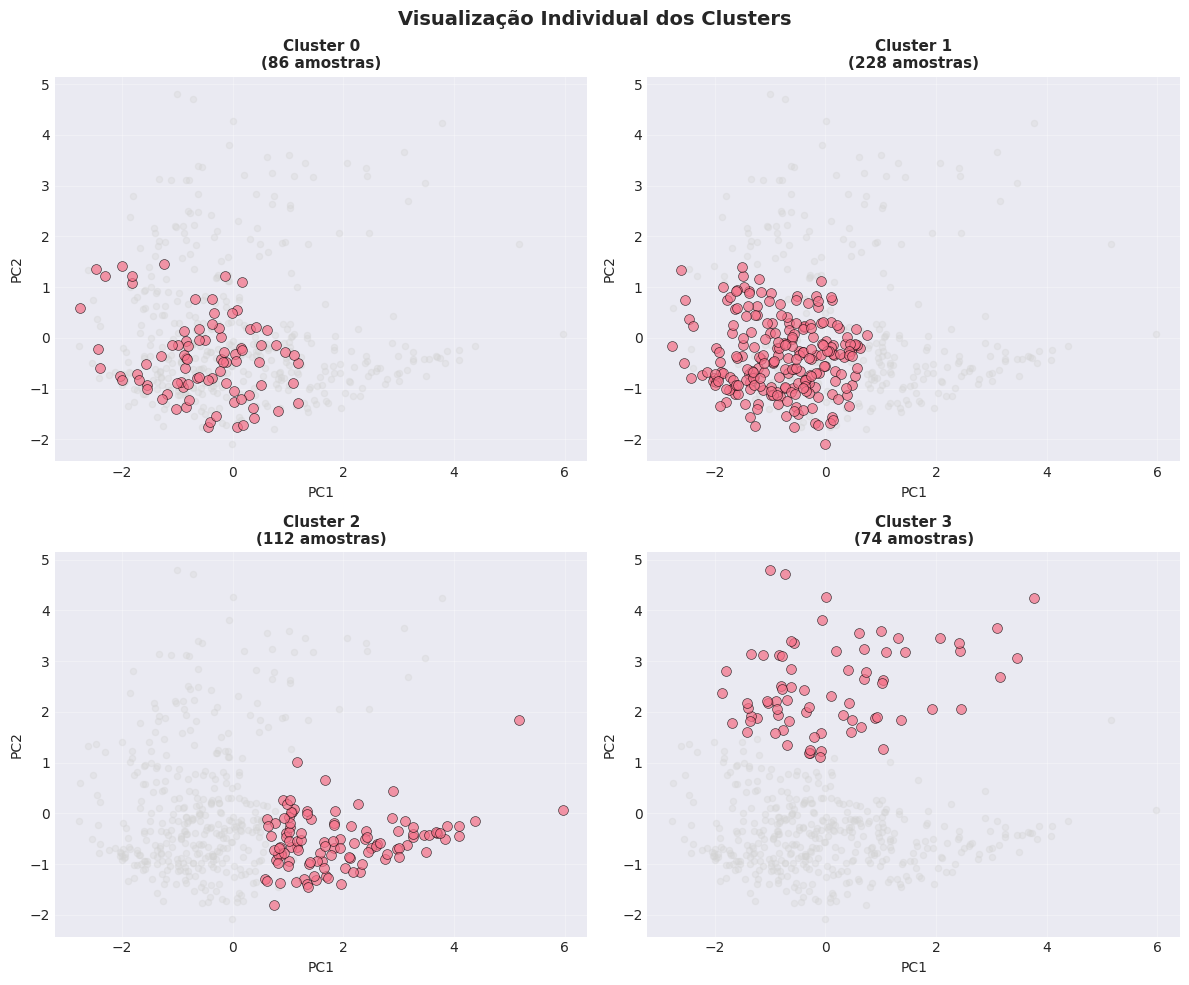

Gráfico salvo em: ../outputs/pca_clusters_individuais.png


In [13]:
# Visualização com contornos de densidade
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()  # Achatar para facilitar iteração

for i in range(min(k_optimal, 4)):  # Limitar a 4 clusters no máximo
    ax = axes[i]
    cluster_data = df_pca[df_pca['Cluster'] == i]
    
    ax.scatter(df_pca['PC1'], df_pca['PC2'], 
               c='lightgray', s=20, alpha=0.3)
    ax.scatter(cluster_data['PC1'], cluster_data['PC2'],
               s=50, alpha=0.7, edgecolors='black', linewidth=0.5)
    
    ax.set_xlabel('PC1', fontsize=10)
    ax.set_ylabel('PC2', fontsize=10)
    ax.set_title(f'Cluster {i}\n({len(cluster_data)} amostras)', 
                 fontsize=11, fontweight='bold')
    ax.grid(True, alpha=0.3)

# Desabilitar eixos não utilizados
for i in range(k_optimal, 4):
    axes[i].axis('off')

plt.suptitle('Visualização Individual dos Clusters', 
             fontsize=14, fontweight='bold', y=0.98)
plt.tight_layout()
plt.savefig('../outputs/pca_clusters_individuais.png', dpi=300, bbox_inches='tight')
plt.show()

print("Gráfico salvo em: ../outputs/pca_clusters_individuais.png")

## 6. Distribuição dos Clusters

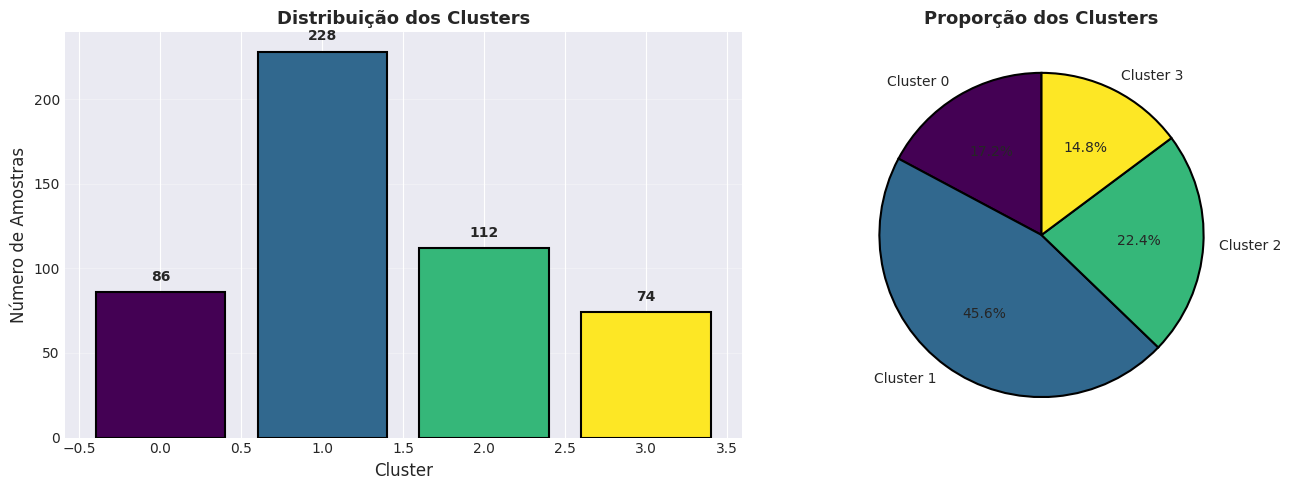


Distribuição dos Clusters:
  Cluster 0: 86 amostras (17.2%)
  Cluster 1: 228 amostras (45.6%)
  Cluster 2: 112 amostras (22.4%)
  Cluster 3: 74 amostras (14.8%)

Gráfico salvo em: ../outputs/distribuicao_clusters.png


In [14]:
# Análise da distribuição dos clusters
cluster_counts = pd.Series(labels).value_counts().sort_index()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de barras
ax1.bar(cluster_counts.index, cluster_counts.values, 
        color=plt.cm.viridis(np.linspace(0, 1, k_optimal)),
        edgecolor='black', linewidth=1.5)
ax1.set_xlabel('Cluster', fontsize=12)
ax1.set_ylabel('Número de Amostras', fontsize=12)
ax1.set_title('Distribuição dos Clusters', fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='y')

for i, v in enumerate(cluster_counts.values):
    ax1.text(i, v + len(labels)*0.01, str(v), 
             ha='center', va='bottom', fontweight='bold')

# Gráfico de pizza
colors = plt.cm.viridis(np.linspace(0, 1, k_optimal))
ax2.pie(cluster_counts.values, labels=[f'Cluster {i}' for i in cluster_counts.index],
        autopct='%1.1f%%', startangle=90, colors=colors,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1.5})
ax2.set_title('Proporção dos Clusters', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.savefig('../outputs/distribuicao_clusters.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nDistribuição dos Clusters:")
for cluster, count in cluster_counts.items():
    pct = (count / len(labels)) * 100
    print(f"  Cluster {cluster}: {count} amostras ({pct:.1f}%)")

print("\nGráfico salvo em: ../outputs/distribuicao_clusters.png")

## 7. Salvar Resultados da Validação

In [15]:
# Salvar métricas em arquivo
resultados_validacao = {
    'k_clusters': k_optimal,
    'silhouette_score': silhouette_avg,
    'davies_bouldin_index': davies_bouldin,
    'checkpoint_validado': silhouette_avg > 0.5,
    'pca_variance_explained': pca.explained_variance_ratio_.sum(),
    'cluster_sizes': cluster_counts.to_dict()
}

# Salvar como CSV
pd.DataFrame([resultados_validacao]).to_csv(
    '../outputs/metricas_validacao_clustering.csv', 
    index=False
)

# Salvar dados com clusters e PCA
df_resultado = df.copy()
df_resultado['cluster'] = labels
df_resultado['pca_1'] = X_pca[:, 0]
df_resultado['pca_2'] = X_pca[:, 1]
df_resultado['silhouette'] = silhouette_vals

df_resultado.to_csv('../data/processed/dataset_clusters_validado.csv', index=False)

print("Resultados salvos:")
print("   - ../outputs/metricas_validacao_clustering.csv")
print("   - ../data/processed/dataset_clusters_validado.csv")

Resultados salvos:
   - ../outputs/metricas_validacao_clustering.csv
   - ../data/processed/dataset_clusters_validado.csv


## 8. Conclusão e Validação Final

In [16]:
print("\n" + "="*70)
print("RELATÓRIO FINAL DE VALIDAÇÃO DO CLUSTERING")
print("="*70)

print(f"\nMÉTRICAS PRINCIPAIS:")
print(f"   • Número de Clusters (K): {k_optimal}")
print(f"   • Silhouette Score: {silhouette_avg:.4f}")
print(f"   • Davies-Bouldin Index: {davies_bouldin:.4f}")
print(f"   • Variância PCA explicada: {pca.explained_variance_ratio_.sum():.2%}")

print(f"\nTAMANHO DOS CLUSTERS:")
for cluster, count in cluster_counts.items():
    pct = (count / len(labels)) * 100
    print(f"   • Cluster {cluster}: {count} amostras ({pct:.1f}%)")

print(f"\nVALIDAÇÃO DO CHECKPOINT:")
if silhouette_avg > 0.5:
    print(f"   CHECKPOINT ATINGIDO!")
    print(f"   Silhouette Score ({silhouette_avg:.4f}) > 0.5")
    print(f"   H2 VALIDADA - Clustering aprovado para uso")
else:
    print(f"   CHECKPOINT NÃO ATINGIDO")
    print(f"   Silhouette Score ({silhouette_avg:.4f}) ≤ 0.5")
    print(f"   Recomenda-se revisar o número de clusters ou features")

print(f"\nARQUIVOS GERADOS:")
print(f"   • Métricas: ../outputs/metricas_validacao_clustering.csv")
print(f"   • Dataset validado: ../data/processed/dataset_clusters_validado.csv")
print(f"   • Silhouette Plot: ../outputs/silhouette_plot.png")
print(f"   • PCA 2D: ../outputs/pca_2d_clusters.png")
print(f"   • Clusters individuais: ../outputs/pca_clusters_individuais.png")
print(f"   • Distribuição: ../outputs/distribuicao_clusters.png")

print("\n" + "="*70)
print("VALIDAÇÃO CONCLUÍDA COM SUCESSO!")
print("="*70)


RELATÓRIO FINAL DE VALIDAÇÃO DO CLUSTERING

MÉTRICAS PRINCIPAIS:
   • Número de Clusters (K): 4
   • Silhouette Score: 0.2672
   • Davies-Bouldin Index: 1.1839
   • Variância PCA explicada: 73.34%

TAMANHO DOS CLUSTERS:
   • Cluster 0: 86 amostras (17.2%)
   • Cluster 1: 228 amostras (45.6%)
   • Cluster 2: 112 amostras (22.4%)
   • Cluster 3: 74 amostras (14.8%)

VALIDAÇÃO DO CHECKPOINT:
   CHECKPOINT NÃO ATINGIDO
   Silhouette Score (0.2672) ≤ 0.5
   Recomenda-se revisar o número de clusters ou features

ARQUIVOS GERADOS:
   • Métricas: ../outputs/metricas_validacao_clustering.csv
   • Dataset validado: ../data/processed/dataset_clusters_validado.csv
   • Silhouette Plot: ../outputs/silhouette_plot.png
   • PCA 2D: ../outputs/pca_2d_clusters.png
   • Clusters individuais: ../outputs/pca_clusters_individuais.png
   • Distribuição: ../outputs/distribuicao_clusters.png

VALIDAÇÃO CONCLUÍDA COM SUCESSO!
